In [226]:
#Importar Archivo
#Generar la ecuacion lineal
#Imprimir los coeficientes
#Generar graficos

In [227]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings

In [228]:
# Ignorar advertencias
warnings.filterwarnings("ignore")

In [229]:
#importar Archivo
df = pd.read_csv('ingreso.csv')
df.head()

,ingreso,horas
0,9973.577534,40.905476
1,8961.047249,41.576483
2,7437.977263,41.369239
3,12064.915290,41.537211
4,9296.396167,40.441203


In [230]:
#identificar valores X y Y
X = df['horas'].values.reshape(-1, 1)
Y = df['ingreso'].values

In [231]:
# Importar la funcion para dividir el conjunto de datos
from sklearn.model_selection import train_test_split

In [232]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42) # Dividir los datos en 80% entrenamiento y 20% prueba

In [233]:
# Crear el modelo de regresión lineal
modelo = LinearRegression()

# Entrenar el modelo
modelo.fit(X_train, Y_train)

# Predecir los valores del conjunto de prueba
Y_pred = modelo.predict(X_test)

In [234]:
# Evaluar el modelo
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

In [235]:
print(f'Error cuadrático medio (MSE): {mse}')
print(f'Coeficiente de determinación (R²): {r2}')
print(f"Intercepto (ordenada al origen): {modelo.intercept_}")
print(f"Coeficientes: {modelo.coef_}")

Error cuadrático medio (MSE): 4098955.5924652424
Coeficiente de determinación (R²): 0.37455573039970536
Intercepto (ordenada al origen): -112252.89697647622
Coeficientes: [2962.84948211]


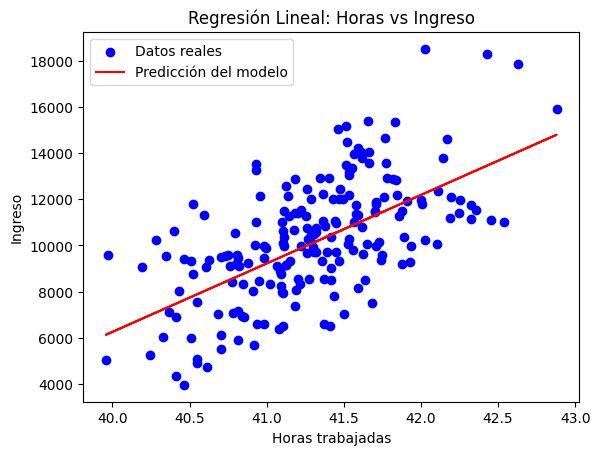

In [236]:
# Visualizar los resultados
import matplotlib.pyplot as plt # Asegurarse de que matplotlib este importado
plt.scatter(X_test, Y_test, color='blue', label='Datos reales')
plt.plot(X_test, Y_pred, color='red', label='Predicción del modelo')
plt.title('Regresión Lineal: Horas vs Ingreso')
plt.xlabel('Horas trabajadas')
plt.ylabel('Ingreso')
plt.legend()
plt.show()

**PARTE 2 EJERCICIO REGRESION LINEAL YOUTUBE**

In [237]:
#Datos del ejercicio de regresión múltiple:
#y =  [78.5, 74.3, 104.3, 87.6, 95.9, 109.2, 102.7, 72.5, 93.1, 115.9, 83.8, 113.3, 109.4]
#x1 = [7, 1, 11, 11, 7, 11, 3, 1, 2, 21, 1, 11, 10]
#x2 = [26, 29, 56, 31, 52, 55, 71, 31, 54, 47, 40, 66, 68]
#x3 = [6, 15, 8, 8, 6, 9, 17, 22, 18, 4, 23, 9, 8]
#x4 = [60, 52, 20, 47, 33, 22, 6, 44, 22, 26, 34, 12, 12]#


In [238]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings

In [239]:

import pandas as pd
import numpy as np

# Arrays de NumPy
X = np.array([1, 2, 2, 3, 4, 4, 5, 6])
Y = np.array([2, 3, 4, 4, 4, 6, 5, 7])

# Calcular la columna XY como el producto de X e Y
XY_calculado = X * Y

# Crear el DataFrame a partir de arrays
df = pd.DataFrame({
    'X': X,
    'Y': Y,
    'XY': XY_calculado,  # Usar el cálculo correcto aquí
    'X^2': X**2
})

# Calcular la suma de las columnas
suma = df.sum().to_frame(name='Suma').T



In [240]:
nueva_fila = pd.DataFrame(df.sum(), columns=['Suma']).T
df = pd.concat([df, nueva_fila], ignore_index=True)
df

,X,Y,XY,X^2
0,1,2,2,1
1,2,3,6,4
2,2,4,8,4
3,3,4,12,9
4,4,4,16,16
5,4,6,24,16
6,5,5,25,25
7,6,7,42,36
8,27,35,135,111


In [241]:
numerador=((len(df)-1)*df['XY'].iloc[-1]-df['X'].iloc[-1]*df['Y'].iloc[-1] )
denominador=((len(df)-1)*df['X^2'].iloc[-1]-df['X'].iloc[-1]**2)
m=numerador/denominador
m

0.8490566037735849

In [242]:
# Calcular b (intercepto)
#b = (y - m * x) / n
b = ((df['Y'].iloc[-1] / (len(df) - 1)) - (m * df['X'].iloc[-1]) / (len(df) - 1))
b

1.5094339622641506

In [256]:
#calcular y final
#y=m*(6)+b #ultimo valor de x
x_ultimo = df['X'].iloc[-2]  # Obtener el último valor de X

# Calcular y final usando el último valor de X en la recta
y_final = m * x_ultimo + b  # Calcular y final

# Mostrar resultados
print(f"La pendiente m es: {m}")
print(f"El intercepto b es: {b}")
print(f"El último valor de X es: {x_ultimo}")
print(f"y final para el último valor de X es: {y_final}")

La pendiente m es: 0.8490566037735849
El intercepto b es: 1.5094339622641506
El último valor de X es: 6
y final para el último valor de X es: 6.60377358490566


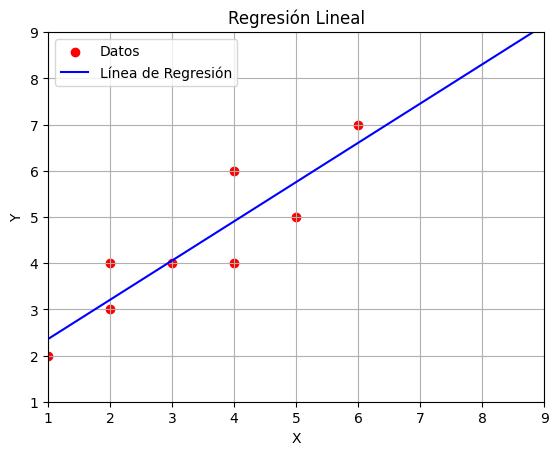

In [260]:
# Graficar los datos y la línea de regresión
plt.scatter(df['X'], df['Y'], color='red', label='Datos')  # Graficar los puntos
plt.plot(df['X'], m * df['X'] + b, color='blue', label='Línea de Regresión')  # Graficar la línea de regresión

# Personalizar el gráfico
plt.title('Regresión Lineal')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
# Establecer los límites de los ejes
plt.xlim(1, 9)  # Limitar el eje X de 1 a 7
plt.ylim(1, 9)  # Limitar el eje Y de 1 a 8
# Mostrar el gráfico
plt.show()

In [265]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Datos de ejemplo
X = np.array([1, 2, 2, 3, 4, 4, 5, 6])
Y = np.array([2, 3, 4, 4, 4, 6, 5, 7])

# Crear el DataFrame
df = pd.DataFrame({
    'X': X,
    'Y': Y
})

# Cálculo de m (pendiente) y b (intercepto)
n = len(df)
sum_x = df['X'].sum()
sum_y = df['Y'].sum()
sum_xy = (df['X'] * df['Y']).sum()
sum_x2 = (df['X'] ** 2).sum()

numerador = (n * sum_xy) - (sum_x * sum_y)
denominador = (n * sum_x2) - (sum_x ** 2)
m = numerador / denominador

b = (sum_y - m * sum_x) / n

# Calcular los valores predichos
df['Y_pred'] = m * df['X'] + b

# Calcular Y - Y_pred
df['Y - Y_pred'] = df['Y'] - df['Y_pred']

# Calcular (Y - Y_pred)^2
df['(Y - Y_pred)^2'] = df['Y - Y_pred'] ** 2

# Calcular el Error Cuadrático Residual (ECR)
ECR = df['(Y - Y_pred)^2'].sum()

# Mostrar el DataFrame con las nuevas columnas y el ECR

df


,X,Y,Y_pred,Y - Y_pred,(Y - Y_pred)^2
0,1,2,2.358491,-0.358491,0.128515
1,2,3,3.207547,-0.207547,0.043076
2,2,4,3.207547,0.792453,0.627981
3,3,4,4.056604,-0.056604,0.003204
4,4,4,4.905660,-0.905660,0.820221
5,4,6,4.905660,1.094340,1.197579
6,5,5,5.754717,-0.754717,0.569598
7,6,7,6.603774,0.396226,0.156995


In [266]:
nueva_fila = pd.DataFrame(df.sum(), columns=['Suma']).T
df = pd.concat([df, nueva_fila], ignore_index=True)
df

,X,Y,Y_pred,Y - Y_pred,(Y - Y_pred)^2
0,1.0,2.0,2.358491,-3.584906e-01,0.128515
1,2.0,3.0,3.207547,-2.075472e-01,0.043076
2,2.0,4.0,3.207547,7.924528e-01,0.627981
3,3.0,4.0,4.056604,-5.660377e-02,0.003204
4,4.0,4.0,4.905660,-9.056604e-01,0.820221
5,4.0,6.0,4.905660,1.094340e+00,1.197579
6,5.0,5.0,5.754717,-7.547170e-01,0.569598
7,6.0,7.0,6.603774,3.962264e-01,0.156995
8,27.0,35.0,35.000000,1.776357e-15,3.547170


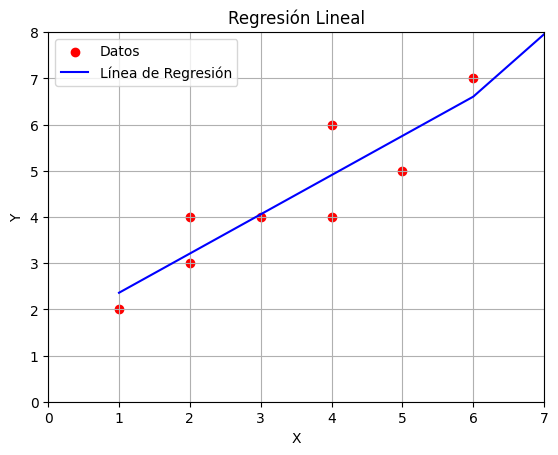

In [272]:
# Graficar los datos y la línea de regresión
plt.scatter(df['X'], df['Y'], color='red', label='Datos')  # Graficar los puntos
plt.plot(df['X'], df['Y_pred'], color='blue', label='Línea de Regresión')  # Graficar la línea de regresión

# Establecer los límites de los ejes
plt.xlim(0, 7)  # Limitar el eje X de 1 a 7
plt.ylim(0, 8)  # Limitar el eje Y de 1 a 8

# Personalizar el gráfico
plt.title('Regresión Lineal')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()
